# COVID-19 GRAPH DATA ANALYTICS in 06/24/2020
## by Thi Van Nguyen
### Master of Statistics in Binghamton University
[**Linkedin**](https://www.linkedin.com/in/thi-van-nguyen-563147104/)




![](https://d3nuqriibqh3vw.cloudfront.net/c0481846-wuhan_novel_coronavirus_illustration-spl.jpg?iFJ36W0T_gU2dfelG0z_E2oaOm_7Gnmv)


**Abstract**: 
Coronavirus diseases 2019(COVID-19) has a strong impact on every aspect over in the world. It is an infectious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). COVID-19 outbreak was first reported in December 2019 in Wuhan, China, and has resulted in an ongoing pandemic. At the time of writing this study, the total number confirmed cases passes over 9,3 millions in over 185 countries and territories around the world,resulting in more than 480,000 deaths.This study aims to visualize data in top countries that are hit hard by the outbreak. 
[Source of information](https://coronavirus.jhu.edu/map.html)

In [3]:

# storing and anaysis
import numpy as np
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)

# visualization
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline
%matplotlib notebook


# hide warnings
import warnings
warnings.filterwarnings('ignore')

from datetime import timedelta  
from datetime import datetime

In [2]:

data = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', 
                         parse_dates=['Date'])
data.head()

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,33.00,65.00,0.00,0.00,0.00
1,2020-01-23,Afghanistan,NaN,33.00,65.00,0.00,0.00,0.00
2,2020-01-24,Afghanistan,NaN,33.00,65.00,0.00,0.00,0.00
3,2020-01-25,Afghanistan,NaN,33.00,65.00,0.00,0.00,0.00
4,2020-01-26,Afghanistan,NaN,33.00,65.00,0.00,0.00,0.00


In [3]:
# cases 
cases = ['Confirmed', 'Deaths', 'Recovered']
# filling missing values 
data[['Province/State']] = data[['Province/State']].fillna('')
data[cases] = data[cases].fillna(0)
data
                                

,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,,33.00,65.00,0.00,0.00,0.00
1,2020-01-23,Afghanistan,,33.00,65.00,0.00,0.00,0.00
2,2020-01-24,Afghanistan,,33.00,65.00,0.00,0.00,0.00
3,2020-01-25,Afghanistan,,33.00,65.00,0.00,0.00,0.00
4,2020-01-26,Afghanistan,,33.00,65.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...
41113,2020-06-19,Zimbabwe,,-20.00,30.00,479.00,63.00,4.00
41114,2020-06-20,Zimbabwe,,-20.00,30.00,479.00,63.00,4.00
41115,2020-06-21,Zimbabwe,,-20.00,30.00,489.00,64.00,6.00
41116,2020-06-22,Zimbabwe,,-20.00,30.00,512.00,64.00,6.00


In [4]:
full_latest = data[data['Date'] == max(data['Date'])].reset_index()
full_latest

,index,Date,Country/Region,Province/State,Lat,Long,Confirmed,Recovered,Deaths
0,153,2020-06-23,Afghanistan,,33.00,65.00,29481.00,9260.00,618.00
1,307,2020-06-23,Albania,,41.15,20.17,2047.00,1195.00,45.00
2,461,2020-06-23,Algeria,,28.03,1.66,12076.00,8674.00,861.00
3,615,2020-06-23,Andorra,,42.51,1.52,855.00,797.00,52.00
4,769,2020-06-23,Angola,,-11.20,17.87,189.00,77.00,10.00
...,...,...,...,...,...,...,...,...,...
262,40501,2020-06-23,West Bank and Gaza,,31.95,35.23,1169.00,442.00,3.00
263,40655,2020-06-23,Western Sahara,,24.22,-12.89,10.00,8.00,1.00
264,40809,2020-06-23,Yemen,,15.55,48.52,992.00,356.00,261.00
265,40963,2020-06-23,Zambia,,-15.42,28.28,1477.00,1213.00,18.00


In [5]:
full_latest["Confirmed"].sum(axis=0)

9263466.0

In [6]:
data_groupby= full_latest.groupby('Country/Region')['Confirmed','Recovered','Deaths'].sum().reset_index()
data_groupby['Mortality Rate']= round((data_groupby['Deaths']/data_groupby['Confirmed'])*100, 2)
data_groupby.head()

,Country/Region,Confirmed,Recovered,Deaths,Mortality Rate
0,Afghanistan,29481.00,9260.00,618.00,2.10
1,Albania,2047.00,1195.00,45.00,2.20
2,Algeria,12076.00,8674.00,861.00,7.13
3,Andorra,855.00,797.00,52.00,6.08
4,Angola,189.00,77.00,10.00,5.29


## Top 30 Countries By Confirmed Cases


In [7]:
data_groupby.sort_values(by='Confirmed', ascending=False, ignore_index=True).head(30).style.background_gradient(cmap='Reds')



,Country/Region,Confirmed,Recovered,Deaths,Mortality Rate
0,US,2347022.000000,647548.000000,121228.000000,5.170000
1,Brazil,1145906.000000,627963.000000,52645.000000,4.590000
2,Russia,598878.000000,355847.000000,8349.000000,1.390000
3,India,456183.000000,258685.000000,14476.000000,3.170000
4,United Kingdom,307682.000000,1330.000000,43011.000000,13.980000
5,Peru,260810.000000,148437.000000,8404.000000,3.220000
6,Chile,250767.000000,210570.000000,4505.000000,1.800000
7,Spain,246752.000000,150376.000000,28325.000000,11.480000
8,Italy,238833.000000,184585.000000,34675.000000,14.520000
9,Iran,209970.000000,169160.000000,9863.000000,4.700000


In [8]:
data_groupby.sort_values?

# Top 30 Countries By Mortality rate


<IPython.core.display.Javascript object>


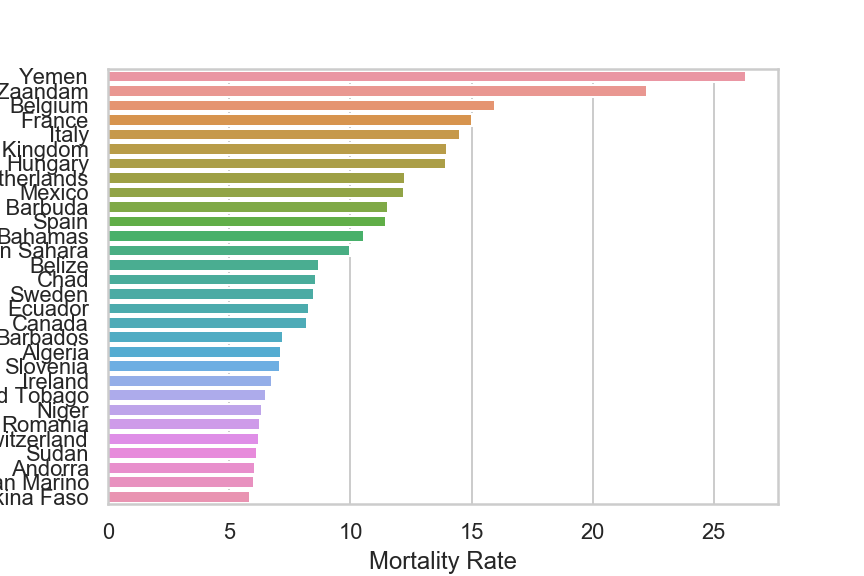

In [9]:
fig = plt.figure()
sns.set_color_codes("pastel")
ax = sns.barplot(x="Mortality Rate", y="Country/Region", data=data_groupby.sort_values(by='Mortality Rate', ascending=False).head(30))

In [17]:

data_groupby_date = data.groupby('Date')['Confirmed','Recovered','Deaths'].sum().reset_index()

data_groupby_date.head()


,Date,Confirmed,Recovered,Deaths
0,2020-01-22,555.00,28.00,17.00
1,2020-01-23,654.00,30.00,18.00
2,2020-01-24,941.00,36.00,26.00
3,2020-01-25,1434.00,39.00,42.00
4,2020-01-26,2118.00,52.00,56.00


In [18]:
data_groupby_date = data_groupby_date.melt(id_vars="Date",
                 value_vars=['Confirmed', 'Deaths', 'Recovered'])
data_groupby_date.head()

,Date,variable,value
0,2020-01-22,Confirmed,555.00
1,2020-01-23,Confirmed,654.00
2,2020-01-24,Confirmed,941.00
3,2020-01-25,Confirmed,1434.00
4,2020-01-26,Confirmed,2118.00


<IPython.core.display.Javascript object>


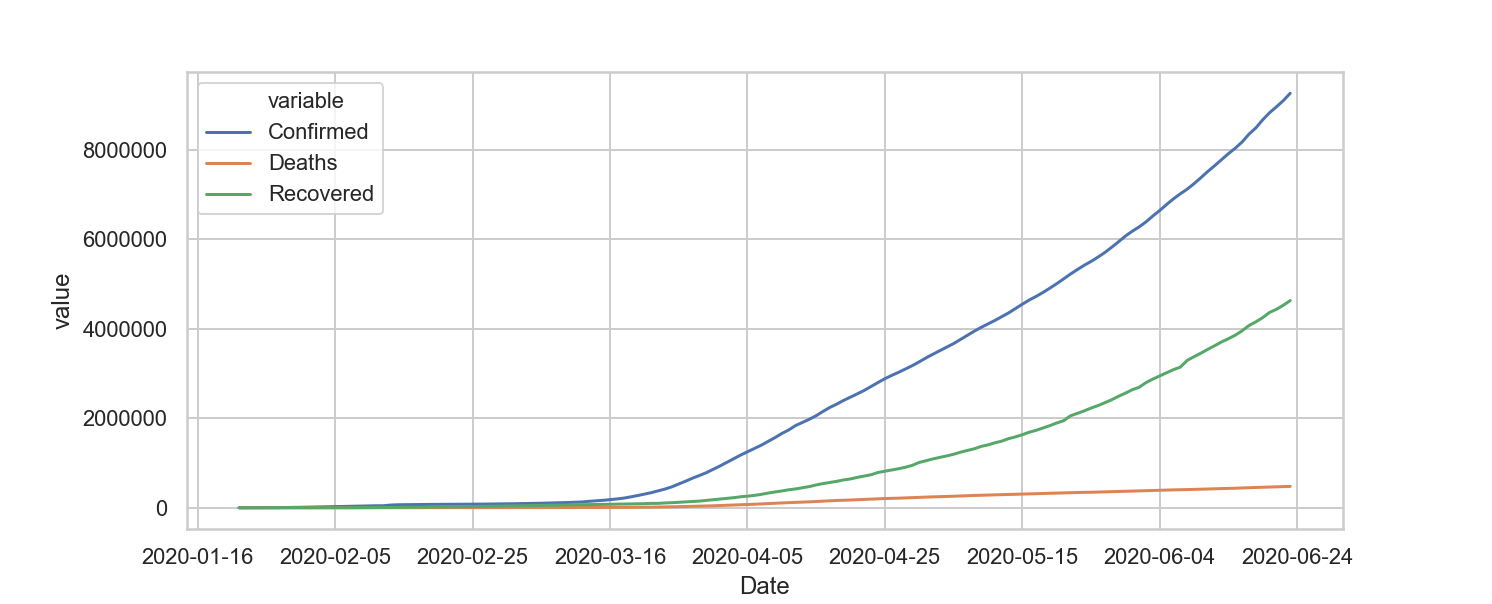

In [19]:
fig = plt.figure()
sns.set_color_codes("pastel")
ax = sns.lineplot(x="Date", y="value", hue="variable", data=data_groupby_date)

ax.xaxis.set_major_locator(plt.MaxNLocator(10));


In [5]:

url= 'https://raw.githubusercontent.com/datasets/covid-19/master/data/us_confirmed.csv'
data1 = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/us_confirmed.csv', parse_dates=['Date'])
data1.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Lat,Combined_Key,Date,Case,Long,Country/Region,Province/State
0,16,AS,ASM,16,60.00,NaN,-14.27,"American Samoa, US",2020-01-22,0,-170.13,US,American Samoa
1,16,AS,ASM,16,60.00,NaN,-14.27,"American Samoa, US",2020-01-23,0,-170.13,US,American Samoa
2,16,AS,ASM,16,60.00,NaN,-14.27,"American Samoa, US",2020-01-24,0,-170.13,US,American Samoa
3,16,AS,ASM,16,60.00,NaN,-14.27,"American Samoa, US",2020-01-25,0,-170.13,US,American Samoa
4,16,AS,ASM,16,60.00,NaN,-14.27,"American Samoa, US",2020-01-26,0,-170.13,US,American Samoa


<IPython.core.display.Javascript object>


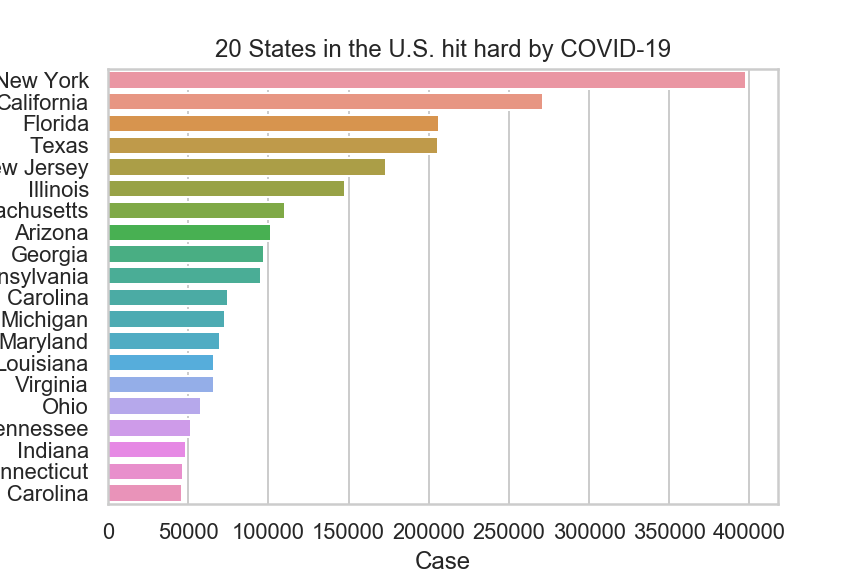

In [13]:
full = data1[data1['Date'] == max(data1['Date'])].reset_index()
full_groupby= full.groupby('Province/State')['Case'].sum().reset_index()
# full_groupby.sort_values(by='Case', ascending=False, ignore_index=True).head(30).style.background_gradient(cmap='Reds')
full1= full_groupby.sort_values(by='Case', ascending=False, ignore_index=True).head(20)
fig = plt.figure()
sns.set_color_codes("pastel")
ax = sns.barplot(x="Case", y="Province/State", data=full1)
plt.title('20 States in the U.S. hit hard by COVID-19') 
  


#Saving the plot as an image
fig.savefig('line plot.jpg', bbox_inches='tight', dpi=150)
plt.show()
